In [8]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random
import pandas as pd

### Datos

In [9]:
ticker = 'CL=F'
data = yf.download(ticker, start='2022-01-01', end='2025-04-07', progress=False)
close_prices = data['Close']

In [10]:
returns = close_prices.pct_change().dropna()
sigma = (returns.std() * np.sqrt(252)).values
S0 = close_prices.iloc[-1].values
T = 1
K = 65
num_steps = 252
r = 0.0425
n_sims = 10000

np.random.seed(42)


### Función Ejercicio 1

In [11]:
def simulate_prices(S0, r, sigma, T, num_steps, n_sims):
    dt = T / num_steps
    Z = np.random.normal(size=(n_sims, num_steps)) ## parámetros estándar : 0 y 1
    simulated_returns = (r - 0.5 * sigma**2) * dt + sigma* np.sqrt(dt) * Z
    simulared_cumulative_returns = np.cumsum(simulated_returns, axis=1)
    simulated_prices = S0* np.exp(simulared_cumulative_returns)
    return simulated_prices


def get_price__fixed_strike__average_price(simulated_prices, K, r, T, option_type):
    avg_prices = np.mean(simulated_prices[:, 1:], axis=1)

    if option_type == 'call':
        payoffs = np.maximum(avg_prices - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - avg_prices, 0)

    option_price =  np.exp(-r * T) * np.mean(payoffs)

    return option_price



def get_price__floating_strike__average_price(simulated_prices, St, r, T, option_type):
    avg_prices = np.mean(simulated_prices[:, 1:], axis=1)
    if option_type == 'call':
        payoffs = np.maximum(St - avg_prices, 0)
    elif option_type == 'put':
        payoffs = np.maximum(avg_prices - St, 0)
    option_price =  np.exp(-r * T) * np.mean(payoffs)

    return option_price

def get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, option_type):
    geometric_prices = np.exp(np.mean(np.log(simulated_prices[:, 1:]), axis=1))
    if option_type == 'call':
        payoffs = np.maximum(geometric_prices - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - geometric_prices, 0)
    option_price =  np.exp(-r * T) * np.mean(payoffs)

    return option_price

def get_price__floating_strike__geometric_price(simulated_prices, St, r, T, option_type):
    geometric_prices = np.exp(np.mean(np.log(simulated_prices[:, 1:]), axis=1))
    if option_type == 'call':
        payoffs = np.maximum(St - geometric_prices, 0)
    elif option_type == 'put':
        payoffs = np.maximum(geometric_prices - St, 0)
    option_price =  np.exp(-r * T) * np.mean(payoffs)

    return option_price


def get_price__european(simulated_prices, K, r, T, option_type):
    St = simulated_prices[:, -1]
    if option_type == 'call':
        payoffs = np.maximum(St - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - St, 0)
    option_price =  np.exp(-r * T) * np.mean(payoffs)

    return option_price    


### Ejemplo Precios opciones

In [12]:
simulated_prices = simulate_prices(S0, r, sigma, T, num_steps, n_sims)
St= np.mean(simulated_prices[:, -1])

In [13]:
precio1 = pd.DataFrame({
    'Media Aritmética': get_price__fixed_strike__average_price(simulated_prices, K, r, T, 'call'),
    'Media Geométrica': get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, 'call'),
    'Media Aritmetica(floating)': get_price__floating_strike__average_price(simulated_prices, St, r, T, 'call'),
    'Media Geométrica(floating)': get_price__floating_strike__geometric_price(simulated_prices, St, r, T, 'call'),
    'European': get_price__european(simulated_prices, K, r, T, 'call')
}, index=['Precio'])
precio1

,Media Aritmética,Media Geométrica,Media Aritmetica(floating),Media Geométrica(floating),European
Precio,4.483365,4.11736,5.943816,6.261928,8.762683


### Ejercicio 2 graficas y comparaciones

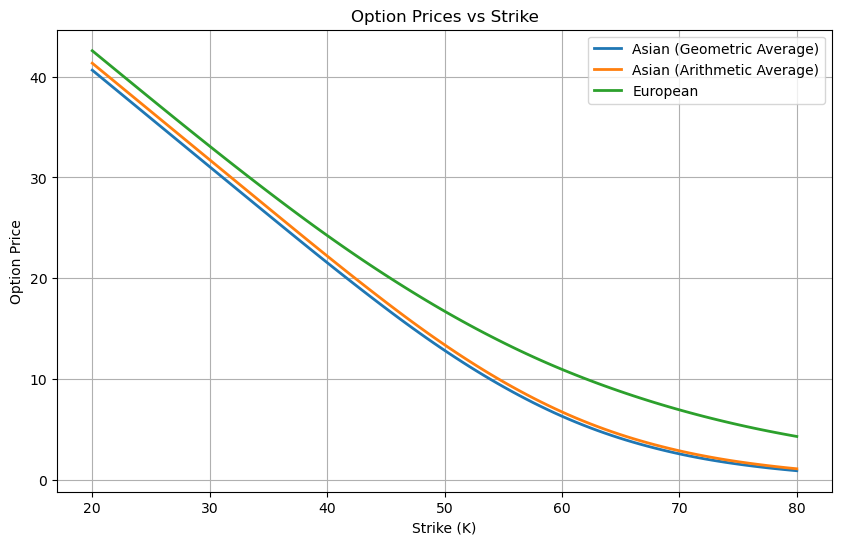

In [14]:
K_rango = np.linspace(20, 80, 100)
geometrica = []
aritmetica = []
europea = []

for K in K_rango:
    geometrica.append(get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, 'call'))
    aritmetica.append(get_price__fixed_strike__average_price(simulated_prices, K, r, T, 'call'))
    europea.append(get_price__european(simulated_prices, K, r, T, 'call'))

plt.figure(figsize=(10, 6))
plt.plot(K_rango, geometrica, label='Asian (Geometric Average)', linewidth=2)
plt.plot(K_rango, aritmetica, label='Asian (Arithmetic Average)', linewidth=2)
plt.plot(K_rango, europea, label='European', linewidth=2)
plt.xlabel('Strike (K)')
plt.ylabel('Option Price')
plt.title('Option Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()


En este caso podemos ver para las opciones call las opcines más baratas son las geometricas, después le siguen las opciones aritmeticas y las más caras son las opciones europeas. 

### Gráfica Put

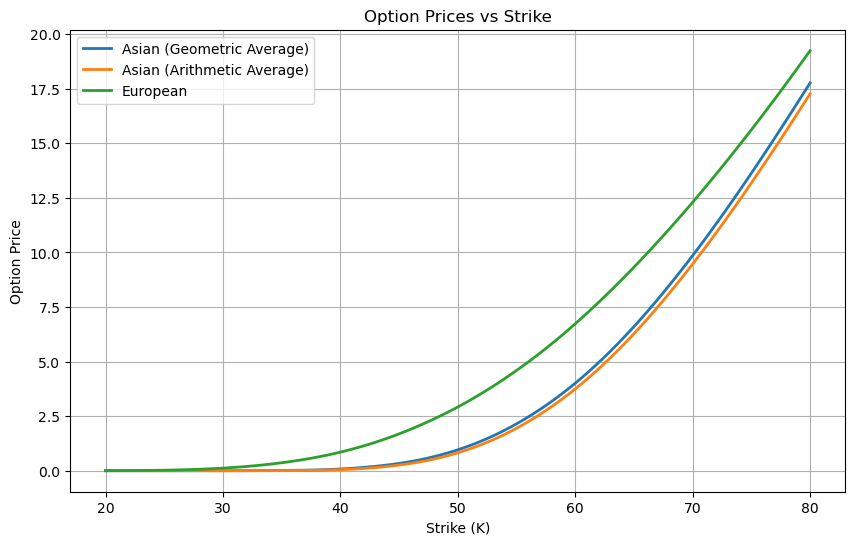

In [15]:
K_rango = np.linspace(20, 80, 100)
geometrica = []
aritmetica = []
europea = []

for K in K_rango:
    geometrica.append(get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, 'put'))
    aritmetica.append(get_price__fixed_strike__average_price(simulated_prices, K, r, T, 'put'))
    europea.append(get_price__european(simulated_prices, K, r, T, 'put'))

plt.figure(figsize=(10, 6))
plt.plot(K_rango, geometrica, label='Asian (Geometric Average)', linewidth=2)
plt.plot(K_rango, aritmetica, label='Asian (Arithmetic Average)', linewidth=2)
plt.plot(K_rango, europea, label='European', linewidth=2)
plt.xlabel('Strike (K)')
plt.ylabel('Option Price')
plt.title('Option Prices vs Strike')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver que si afecta si los cambios en el tipo de opciones cambian ya que ahora que usamos un tipo de opcion put, la opción más barata son las aritmeticas, después le siguen las geometricas y lo que si se mantiene es que las opciones más caras son las europeas. 

#### Conclusión

Podemos ver en las gráficas que la europea se mantiene como la opción más cara ya sea con calls o puts, sin embargo las opciones de media aritmetica y geometrica cambian de lugar, siendo en los call, la geometrica más barata y en los puts, la aritmetica la más barata. Esto se puede deber a lo que se espera como actuen los subyacentes, y por el valor de las medias. Por lo general la media geometrica es menor a la aritmetica, por lo cual en las opcines call, hace que su valor se reduzca, es por esto que es la más barata. Por otro lado, en los puts esto se cambia, dando com resultado que la aritmetica sea la menor. 

### Ejercicio 3 Comparaciones

In [16]:
K=65

#### Call

In [17]:
import pandas as pd
prices= pd.DataFrame({
    'European': get_price__european(simulated_prices, K, r, T, 'call'),
    'Asian (Arithmetic)': get_price__fixed_strike__average_price(simulated_prices, K, r, T, 'call'),
    'Asian (Geometric)': get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, 'call'),
    'Asian (Floating Strike)': get_price__floating_strike__average_price(simulated_prices, St, r, T, 'call'),
    'Asian (Floating Geometric)': get_price__floating_strike__geometric_price(simulated_prices, St, r, T, 'call'),
}, index =['precio'])
prices

,European,Asian (Arithmetic),Asian (Geometric),Asian (Floating Strike),Asian (Floating Geometric)
precio,8.762683,4.483365,4.11736,5.943816,6.261928


#### Put

In [18]:
import pandas as pd
prices= pd.DataFrame({
    'European': get_price__european(simulated_prices, K, r, T, 'put'),
    'Asian (Arithmetic)': get_price__fixed_strike__average_price(simulated_prices, K, r, T, 'put'),
    'Asian (Geometric)': get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, 'put'),
    'Asian (Floating Strike)': get_price__floating_strike__average_price(simulated_prices, St, r, T, 'put'),
    'Asian (Floating Geometric)': get_price__floating_strike__geometric_price(simulated_prices, St, r, T, 'put'),
}, index =['precio'])
prices

,European,Asian (Arithmetic),Asian (Geometric),Asian (Floating Strike),Asian (Floating Geometric)
precio,9.324537,6.277347,6.60225,4.711689,4.338892


#### Conclusión

Como podemos observar en los resultados, se puede ver que las opciones asiaticas cuestan menos que las europeas, ya que tanto las de media aritmetica como las de media gemoetrica, tienen uun valor menor que el de las opciones europeas. También es importante mencionar que si cambian las opciones que son más baratas si tenemos un tipo put o un tipo call. En este caso las opciones europeas se mantienen como las caras, pero hay un cambio en las opciones asiaticas, donde si se trata de una opción call, las más baratas son las que no usan St, siendo la geometrica la nde menor costo, y si son opciones put, las opciones que más baratas son las asiaticas que usan St, siendo la gemoetrica de igual forma la más barata.

Con esto podemos inferir que si se busca opciones que quiza no tengan tanto riesgo para poder ejercerse y que sean más accesibles, las indicadas son las asiaticas, ya que tienen un costo menor,por lo cual se puede esperar que su prima sea más accesible que las opciones europeas, ya dependerá del perfil de inversor que busque las opciones y el fin que le quiera dar a estas.